<a href="https://colab.research.google.com/github/raulsomazabracho/Revenue-Growth-Management/blob/main/Elasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codigo que permite calcular elasticidades con la Data de una base de ventas

# Importamos librerias

In [ ]:
#Importo las librerias a utilizar
import pandas as pd
import datetime as dt 
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

# Leemos DB

In [ ]:
#Leemos el archivo
ventas = pd.read_excel(r'G:/Unidades compartidas/MO PROYECTOS CONSULTORIA/REVENUE MANAGEMENT/INDUSTRY SIMULATOR/01. Database/01.DB Sales Raul.xlsm', usecols = ['OrderDate','Region','City','Category','Product','Quantity','UnitCost','UnitNetCost'])
ventas.rename({'City':'Ciudad','Category':'Categoria','Product':'name', 'Quantity':'quantity_mean','UnitCost':'price_mean'}, axis =1, inplace =True)
print("Longitud de la base de datos:: ", len(ventas))
ventas['OrderDate'] = pd.to_datetime(ventas['OrderDate']).dt.to_period('M')
ventas.head()

Longitud de la base de datos::  734


,OrderDate,Region,Ciudad,Categoria,name,quantity_mean,price_mean,UnitNetCost
0,2020-01,East,Boston,Bars,Carrot,33.0,1.0620,1.6815
1,2020-01,East,Boston,Crackers,Whole Wheat,87.0,1.9195,3.1410
2,2020-01,West,Los Angeles,Cookies,Chocolate Chip,58.0,0.9350,1.5895
3,2020-01,East,New York,Cookies,Chocolate Chip,82.0,0.9350,1.8700
4,2020-01,East,Boston,Cookies,Arrowroot,38.0,0.9810,2.0710


# Ordenamos DB

In [ ]:
#Filtramos la categoria en cuestión en un sitio determninado, es posible que distintos sitios tengan distintos comportamiento y alterenel analisis del producto en cuestión
ventas_1 = ventas[ventas['name']=='Carrot']
ventas_2 = ventas[ventas['name']=='Bran']
ventas_3 = ventas[ventas['name']=='Banana']
ventas_4 = ventas[ventas['name']=='Chocolate Chip']
ventas_5 = ventas[ventas['name']=='Oatmeal Raisin']
ventas_6 = ventas[ventas['name']=='Arrowroot']

print("Longitud de la base de datos post-ciudad y post-producto: ", len(ventas))
ventas_2.head()

Longitud de la base de datos post-ciudad y post-producto:  734


,OrderDate,Region,Ciudad,Categoria,name,quantity_mean,price_mean,UnitNetCost
18,2020-02,West,Los Angeles,Bars,Bran,42.0,0.561,1.5895
28,2020-03,East,Boston,Bars,Bran,103.0,0.561,1.7765
41,2020-05,East,Boston,Bars,Bran,105.0,0.561,1.6830
59,2020-06,East,New York,Bars,Bran,110.0,0.561,1.8700
66,2020-07,East,New York,Bars,Bran,72.0,0.561,1.5895


In [ ]:
#Agrupamos para ver elasticidades
ventas_agrupadas_1 = ventas_1.groupby(['OrderDate','name']).agg({'quantity_mean':'mean','price_mean':'sum'}).reset_index()
ventas_agrupadas_2 = ventas_2.groupby(['OrderDate','name']).agg({'quantity_mean':'mean','price_mean':'mean'}).reset_index()
ventas_agrupadas_3 = ventas_3.groupby(['OrderDate','name']).agg({'quantity_mean':'mean','price_mean':'mean'}).reset_index()
ventas_agrupadas_4 = ventas_4.groupby(['OrderDate','name']).agg({'quantity_mean':'mean','price_mean':'mean'}).reset_index()
ventas_agrupadas_5 = ventas_5.groupby(['OrderDate','name']).agg({'quantity_mean':'mean','price_mean':'mean'}).reset_index()
ventas_agrupadas_6 = ventas_6.groupby(['OrderDate','name']).agg({'quantity_mean':'mean','price_mean':'mean'}).reset_index()
print(len(ventas_agrupadas))
ventas_agrupadas.head(11)
ventas_agrupadas_1 = ventas_agrupadas_1[ventas_agrupadas_1['OrderDate']<'2021-01']
print(ventas_agrupadas_1.quantity_mean.sum())

5
914.9391666666666


In [ ]:
#Configuramos nuestro volumen como variable independiente
x_pivot_1 = ventas_agrupadas_1.pivot(index= 'OrderDate' ,columns='name' ,values='price_mean')
x_values_1 = pd.DataFrame(x_pivot_1.to_records())

x_pivot_2 = ventas_agrupadas_2.pivot(index= 'OrderDate' ,columns='name' ,values='price_mean')
x_values_2 = pd.DataFrame(x_pivot_2.to_records())

x_pivot_3 = ventas_agrupadas_3.pivot(index= 'OrderDate' ,columns='name' ,values='price_mean')
x_values_3 = pd.DataFrame(x_pivot_3.to_records())

x_pivot_4 = ventas_agrupadas_4.pivot(index= 'OrderDate' ,columns='name' ,values='price_mean')
x_values_4 = pd.DataFrame(x_pivot_4.to_records())

x_pivot_5 = ventas_agrupadas_5.pivot(index= 'OrderDate' ,columns='name' ,values='price_mean')
x_values_5 = pd.DataFrame(x_pivot_5.to_records())

x_pivot_6 = ventas_agrupadas_6.pivot(index= 'OrderDate' ,columns='name' ,values='price_mean')
x_values_6 = pd.DataFrame(x_pivot_6.to_records())

print(len(x_values_1))
print(x_values_1)

12
   OrderDate  Carrot
0    2020-01  12.744
1    2020-02   6.372
2    2020-03   6.372
3    2020-04  15.930
4    2020-05   9.558
5    2020-06   9.558
6    2020-07   6.372
7    2020-08   6.372
8    2020-09   9.558
9    2020-10  12.744
10   2020-11  12.744
11   2020-12   3.186


In [ ]:
#Variable dependiente
y_pivot_1 = ventas_agrupadas_1.pivot( index = 'OrderDate',columns='name', values='quantity_mean')
y_values_1 = pd.DataFrame(y_pivot_1.to_records())

y_pivot_2 = ventas_agrupadas_2.pivot( index = 'OrderDate',columns='name', values='quantity_mean')
y_values_2 = pd.DataFrame(y_pivot_2.to_records())

y_pivot_3 = ventas_agrupadas_3.pivot( index = 'OrderDate',columns='name', values='quantity_mean')
y_values_3 = pd.DataFrame(y_pivot_3.to_records())

y_pivot_4 = ventas_agrupadas_4.pivot( index = 'OrderDate',columns='name', values='quantity_mean')
y_values_4 = pd.DataFrame(y_pivot_4.to_records())

y_pivot_5 = ventas_agrupadas_5.pivot( index = 'OrderDate',columns='name', values='quantity_mean')
y_values_5 = pd.DataFrame(y_pivot_5.to_records())

y_pivot_6 = ventas_agrupadas_6.pivot( index = 'OrderDate',columns='name', values='quantity_mean')
y_values_6 = pd.DataFrame(y_pivot_6.to_records())

print(y_values_1)

   OrderDate      Carrot
0    2020-01   65.648333
1    2020-02   36.961667
2    2020-03   54.615000
3    2020-04   59.580000
4    2020-05   52.960000
5    2020-06  155.570000
6    2020-07  103.713333
7    2020-08   73.371667
8    2020-09  118.056667
9    2020-10   76.681667
10   2020-11   69.234167
11   2020-12   48.546667


# Calculo de Elasticidades

In [ ]:
#BARRAS
#CARROT
points = []
results_values = {
    "Producto": [],
    "Elasticidad del Precio": [],
    "Precio Unitario Promedio": [],
    "Volumen por pedido Promedio": [],
    "Intercepción": [],
    "t_score":[],
    "Coeficiente de Elasticidad": [],
    "Coeficiente p" : [],
    "R Cuadrado" : [],
}
#Append x_values with y_values per same product name
for column in x_values_1.columns[1:]:
    column_points = []
    for i in range(len(x_values_1[column])):
        if not np.isnan(x_values_1[column][i]) and not np.isnan(y_values_1[column][i]):
            column_points.append((x_values_1[column][i], y_values_1[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    print(df)
    #Modelo de Regresion Lineal
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    rsquared = result.rsquared
    print("R Cuadrado es:",rsquared)
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues
    #Elasticidad en el precio
    price_elasticity = (slope)*(mean_price/mean_quantity)    
    #Appendamos en un diccionario para convertirlo en DF luego
    results_values["Producto"].append(column)
    results_values["Elasticidad del Precio"].append(price_elasticity)
    results_values["Precio Unitario Promedio"].append(mean_price)
    results_values["Volumen por pedido Promedio"].append(mean_quantity)
    results_values["Intercepción"].append(intercept)
    results_values['t_score'].append(t_score)
    results_values["Coeficiente de Elasticidad"].append(slope)
    results_values["Coeficiente p"].append(coefficient_pvalue)
    results_values["R Cuadrado"].append(rsquared)            
final_df_1 = pd.DataFrame.from_dict(results_values)
final_df_1[['Producto','Elasticidad del Precio','t_score','Coeficiente p','Coeficiente de Elasticidad','Precio Unitario Promedio','Volumen por pedido Promedio','Intercepción','R Cuadrado']]

#BRAN
points = []
results_values = {
    "Producto": [],
    "Elasticidad del Precio": [],
    "Precio Unitario Promedio": [],
    "Volumen por pedido Promedio": [],
    "Intercepción": [],
    "t_score":[],
    "Coeficiente de Elasticidad": [],
    "Coeficiente p" : [],
    "R Cuadrado" : [],
}
#Append x_values with y_values per same product name
for column in x_values_2.columns[1:]:
    column_points = []
    for i in range(len(x_values_2[column])):
        if not np.isnan(x_values_2[column][i]) and not np.isnan(y_values_2[column][i]):
            column_points.append((x_values_2[column][i], y_values_2[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    print(df)
    #Modelo de Regresion Lineal
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    rsquared = result.rsquared
    print("R Cuadrado es:",rsquared)
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues
    #Elasticidad en el precio
    price_elasticity = (slope)*(mean_price/mean_quantity)    
    #Appendamos en un diccionario para convertirlo en DF luego
    results_values["Producto"].append(column)
    results_values["Elasticidad del Precio"].append(price_elasticity)
    results_values["Precio Unitario Promedio"].append(mean_price)
    results_values["Volumen por pedido Promedio"].append(mean_quantity)
    results_values["Intercepción"].append(intercept)
    results_values['t_score'].append(t_score)
    results_values["Coeficiente de Elasticidad"].append(slope)
    results_values["Coeficiente p"].append(coefficient_pvalue)
    results_values["R Cuadrado"].append(rsquared)            
final_df_2 = pd.DataFrame.from_dict(results_values)
final_df_2[['Producto','Elasticidad del Precio','t_score','Coeficiente p','Coeficiente de Elasticidad','Precio Unitario Promedio','Volumen por pedido Promedio','Intercepción','R Cuadrado']]

#BRAN
print(y_values_3)
points = []
results_values = {
    "Producto": [],
    "Elasticidad del Precio": [],
    "Precio Unitario Promedio": [],
    "Volumen por pedido Promedio": [],
    "Intercepción": [],
    "t_score":[],
    "Coeficiente de Elasticidad": [],
    "Coeficiente p" : [],
    "R Cuadrado" : [],
}
#Append x_values with y_values per same product name
for column in x_values_3.columns[1:]:
    column_points = []
    for i in range(len(x_values_3[column])):
        if not np.isnan(x_values_3[column][i]) and not np.isnan(y_values_3[column][i]):
            column_points.append((x_values_3[column][i], y_values_3[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    print(df)
    #Modelo de Regresion Lineal
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    rsquared = result.rsquared
    print("R Cuadrado es:",rsquared)
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues
    #Elasticidad en el precio
    price_elasticity = (slope)*(mean_price/mean_quantity)    
    #Appendamos en un diccionario para convertirlo en DF luego
    results_values["Producto"].append(column)
    results_values["Elasticidad del Precio"].append(price_elasticity)
    results_values["Precio Unitario Promedio"].append(mean_price)
    results_values["Volumen por pedido Promedio"].append(mean_quantity)
    results_values["Intercepción"].append(intercept)
    results_values['t_score'].append(t_score)
    results_values["Coeficiente de Elasticidad"].append(slope)
    results_values["Coeficiente p"].append(coefficient_pvalue)
    results_values["R Cuadrado"].append(rsquared)            
final_df_3 = pd.DataFrame.from_dict(results_values)
final_df_3[['Producto','Elasticidad del Precio','t_score','Coeficiente p','Coeficiente de Elasticidad','Precio Unitario Promedio','Volumen por pedido Promedio','Intercepción','R Cuadrado']]


#CHOCOLATE CHIP
points = []
results_values = {
    "Producto": [],
    "Elasticidad del Precio": [],
    "Precio Unitario Promedio": [],
    "Volumen por pedido Promedio": [],
    "Intercepción": [],
    "t_score":[],
    "Coeficiente de Elasticidad": [],
    "Coeficiente p" : [],
    "R Cuadrado" : [],
}
#Append x_values with y_values per same product name
for column in x_values_4.columns[1:]:
    column_points = []
    for i in range(len(x_values_4[column])):
        if not np.isnan(x_values_4[column][i]) and not np.isnan(y_values_4[column][i]):
            column_points.append((x_values_4[column][i], y_values_4[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    print(df)
    #Modelo de Regresion Lineal
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    rsquared = result.rsquared
    print("R Cuadrado es:",rsquared)
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues
    #Elasticidad en el precio
    price_elasticity = (slope)*(mean_price/mean_quantity)    
    #Appendamos en un diccionario para convertirlo en DF luego
    results_values["Producto"].append(column)
    results_values["Elasticidad del Precio"].append(price_elasticity)
    results_values["Precio Unitario Promedio"].append(mean_price)
    results_values["Volumen por pedido Promedio"].append(mean_quantity)
    results_values["Intercepción"].append(intercept)
    results_values['t_score'].append(t_score)
    results_values["Coeficiente de Elasticidad"].append(slope)
    results_values["Coeficiente p"].append(coefficient_pvalue)
    results_values["R Cuadrado"].append(rsquared)            
final_df_4 = pd.DataFrame.from_dict(results_values)
final_df_4[['Producto','Elasticidad del Precio','t_score','Coeficiente p','Coeficiente de Elasticidad','Precio Unitario Promedio','Volumen por pedido Promedio','Intercepción','R Cuadrado']]

#BRAN
points = []
results_values = {
    "Producto": [],
    "Elasticidad del Precio": [],
    "Precio Unitario Promedio": [],
    "Volumen por pedido Promedio": [],
    "Intercepción": [],
    "t_score":[],
    "Coeficiente de Elasticidad": [],
    "Coeficiente p" : [],
    "R Cuadrado" : [],
}
#Append x_values with y_values per same product name
for column in x_values_5.columns[1:]:
    column_points = []
    for i in range(len(x_values_5[column])):
        if not np.isnan(x_values_5[column][i]) and not np.isnan(y_values_5[column][i]):
            column_points.append((x_values_5[column][i], y_values_5[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    print(df)
    #Modelo de Regresion Lineal
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    rsquared = result.rsquared
    print("R Cuadrado es:",rsquared)
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues
    #Elasticidad en el precio
    price_elasticity = (slope)*(mean_price/mean_quantity)    
    #Appendamos en un diccionario para convertirlo en DF luego
    results_values["Producto"].append(column)
    results_values["Elasticidad del Precio"].append(price_elasticity)
    results_values["Precio Unitario Promedio"].append(mean_price)
    results_values["Volumen por pedido Promedio"].append(mean_quantity)
    results_values["Intercepción"].append(intercept)
    results_values['t_score'].append(t_score)
    results_values["Coeficiente de Elasticidad"].append(slope)
    results_values["Coeficiente p"].append(coefficient_pvalue)
    results_values["R Cuadrado"].append(rsquared)            
final_df_5 = pd.DataFrame.from_dict(results_values)
final_df_5[['Producto','Elasticidad del Precio','t_score','Coeficiente p','Coeficiente de Elasticidad','Precio Unitario Promedio','Volumen por pedido Promedio','Intercepción','R Cuadrado']]

#BRAN
print(y_values_3)
points = []
results_values = {
    "Producto": [],
    "Elasticidad del Precio": [],
    "Precio Unitario Promedio": [],
    "Volumen por pedido Promedio": [],
    "Intercepción": [],
    "t_score":[],
    "Coeficiente de Elasticidad": [],
    "Coeficiente p" : [],
    "R Cuadrado" : [],
}
#Append x_values with y_values per same product name
for column in x_values_6.columns[1:]:
    column_points = []
    for i in range(len(x_values_6[column])):
        if not np.isnan(x_values_6[column][i]) and not np.isnan(y_values_6[column][i]):
            column_points.append((x_values_6[column][i], y_values_6[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    print(df)
    #Modelo de Regresion Lineal
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    rsquared = result.rsquared
    print("R Cuadrado es:",rsquared)
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues
    #Elasticidad en el precio
    price_elasticity = (slope)*(mean_price/mean_quantity)    
    #Appendamos en un diccionario para convertirlo en DF luego
    results_values["Producto"].append(column)
    results_values["Elasticidad del Precio"].append(price_elasticity)
    results_values["Precio Unitario Promedio"].append(mean_price)
    results_values["Volumen por pedido Promedio"].append(mean_quantity)
    results_values["Intercepción"].append(intercept)
    results_values['t_score'].append(t_score)
    results_values["Coeficiente de Elasticidad"].append(slope)
    results_values["Coeficiente p"].append(coefficient_pvalue)
    results_values["R Cuadrado"].append(rsquared)            
final_df_6 = pd.DataFrame.from_dict(results_values)
final_df_6[['Producto','Elasticidad del Precio','t_score','Coeficiente p','Coeficiente de Elasticidad','Precio Unitario Promedio','Volumen por pedido Promedio','Intercepción','R Cuadrado']]


    x_value     y_value
0    12.744   65.648333
1     6.372   36.961667
2     6.372   54.615000
3    15.930   59.580000
4     9.558   52.960000
5     9.558  155.570000
6     6.372  103.713333
7     6.372   73.371667
8     9.558  118.056667
9    12.744   76.681667
10   12.744   69.234167
11    3.186   48.546667
R Cuadrado es: 0.009063980256793225
    x_value     y_value
0     0.561   46.340000
1     0.561  113.643333
2     0.561  115.850000
3     0.561  121.366667
4     0.561   65.832222
5     0.561   82.750000
6     0.561   36.410000
7     0.561   72.820000
8     0.561   84.956667
9     0.561   77.601111
10    0.561   29.790000
11    0.561   51.856667
12    0.561   35.858333
13    0.561   50.201667
14    0.561   43.030000
15    0.561   55.166667
16    0.561   55.166667
17    0.561   91.576667
18    0.561   39.720000
R Cuadrado es: 0.0
  OrderDate     Banana
0   2020-12  33.100000
1   2021-06  29.790000
2   2021-07  24.273333
   x_value    y_value
0    0.454  33.100000
1    0.454  29.79

ValueError: not enough values to unpack (expected 2, got 1)

# Resultados

In [ ]:
final_df = pd.concat([final_df_1,final_df_2,final_df_3,final_df_4,final_df_5,final_df_6], ignore_index = True)
final_df.head()

,Producto,Elasticidad del Precio,Precio Unitario Promedio,Volumen por pedido Promedio,Intercepción,t_score,Coeficiente de Elasticidad,Coeficiente p,R Cuadrado
0,Carrot,-0.232045,1.638661,71.928539,88.619214,-0.085464,-10.185558,0.932702,0.000348
1,Bran,1.519475,1.726469,66.838772,-34.721097,0.818129,58.825181,0.424603,0.037881
2,Banana,-1.914557,2.080833,29.054444,84.680833,-1.270171,-26.732746,0.424591,0.617347
3,Chocolate Chip,-5.350067,1.760917,77.151605,489.917853,-1.867976,-234.404192,0.080191,0.179038
4,Oatmeal Raisin,-0.163600,2.603333,90.026746,104.755097,-0.093730,-5.657497,0.926305,0.000462


## Graficos

In [ ]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =False, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['ranking'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)
    
    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['ranking'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})
        
    
    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['ranking'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
            
    
    #Adjust Ranking column and print dataframe
    pd.set_option('display.width', 4000)
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    df = df.iloc[:,:3]
    df.set_index('ranking', inplace=True)
    display(df)

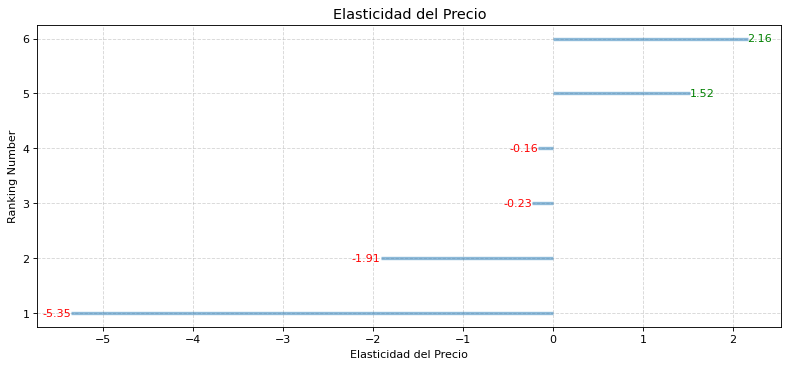

,Producto,Elasticidad del Precio
ranking,,
6,Arrowroot,2.161481
5,Bran,1.519475
4,Oatmeal Raisin,-0.163600
3,Carrot,-0.232045
2,Banana,-1.914557
1,Chocolate Chip,-5.350067


,Producto,Elasticidad del Precio,Precio Unitario Promedio,Volumen por pedido Promedio,Intercepción,t_score,Coeficiente de Elasticidad,Coeficiente p,R Cuadrado,ranking
5,Arrowroot,2.161481,2.022556,77.631759,-90.167795,0.679863,82.964126,0.506309,0.028077,6
1,Bran,1.519475,1.726469,66.838772,-34.721097,0.818129,58.825181,0.424603,0.037881,5
4,Oatmeal Raisin,-0.163600,2.603333,90.026746,104.755097,-0.093730,-5.657497,0.926305,0.000462,4
0,Carrot,-0.232045,1.638661,71.928539,88.619214,-0.085464,-10.185558,0.932702,0.000348,3
2,Banana,-1.914557,2.080833,29.054444,84.680833,-1.270171,-26.732746,0.424591,0.617347,2


In [ ]:
divergent_plot(final_df,'Elasticidad del Precio',"Ranking Number","Elasticidad del Precio")
final_df.head()